In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [104]:
#Realizamos la lectrua de la información y procedeomos a modificar las fechas a valores legibles
datos = pd.read_csv('us_perm_visas.csv',low_memory=False,
        parse_dates=['decision_date','case_received_date'])

# Descripción del conjunto de datos

Número y tipo de características (binarias, discretas, continuas, etc.)

In [105]:
# Número de atributos o características y número de filas
print("Número de atributos/columnas:",len(datos.columns))
print("Número de filas:",len(datos))

Número de atributos/columnas: 154
Número de filas: 374362


In [106]:
# Tipos de datos existentes en las características
datos.dtypes.value_counts()

object            142
float64            10
datetime64[ns]      2
dtype: int64

In [108]:
# descripcion de las caracterísiticas. Si el dataframe tiene diferentes tipos de datos, 
# sólo se consideran los datos numéricos 
datos.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaT,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaT,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaT,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaT,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaT,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN


Todo el set de datos se compone de 374362 filas o registros de aplicaciones. Mientras que se cuentan con 154 atributos los cuales se dividen entre 142 valores categóricos, 10 numéricos y 2 de fechas

In [109]:
print(datos.columns.values)

['add_these_pw_job_title_9089' 'agent_city' 'agent_firm_name'
 'agent_state' 'application_type' 'case_no' 'case_number'
 'case_received_date' 'case_status' 'class_of_admission'
 'country_of_citizenship' 'country_of_citzenship' 'decision_date'
 'employer_address_1' 'employer_address_2' 'employer_city'
 'employer_country' 'employer_decl_info_title' 'employer_name'
 'employer_num_employees' 'employer_phone' 'employer_phone_ext'
 'employer_postal_code' 'employer_state' 'employer_yr_estab'
 'foreign_worker_info_alt_edu_experience'
 'foreign_worker_info_birth_country' 'foreign_worker_info_city'
 'foreign_worker_info_education' 'foreign_worker_info_education_other'
 'foreign_worker_info_inst' 'foreign_worker_info_major'
 'foreign_worker_info_postal_code' 'foreign_worker_info_rel_occup_exp'
 'foreign_worker_info_req_experience' 'foreign_worker_info_state'
 'foreign_worker_info_training_comp' 'foreign_worker_ownership_interest'
 'foreign_worker_yr_rel_edu_completed' 'fw_info_alt_edu_experience'

# Limpieza de datos y Evaluación de posible data duplicada o separada
# 1. case_number y case_no
donde la data que se encuentra en uno no se encuentra en la otra, con lo que serían complementarias

In [110]:
data=pd.DataFrame()
data['number']=datos['case_number']
data['no']=datos['case_no']
data['cantidad'] = data.apply(lambda x: x.count(), axis=1)


In [111]:
print('Total de registros: ',len(data))
data.loc[data['cantidad'] ==1].count()

Total de registros:  374362


number      239093
no          135269
cantidad    374362
dtype: int64

Se procederá a eliminar la data de ambas columnas y crear una nueva en función a la data de estos dos campos

In [112]:
datos['case_number_new']=datos['case_number']
datos['case_number_new']
mask = datos['case_number_new'].isnull()
column_name = 'case_number_new'
datos.loc[mask, column_name] = datos['case_no']


In [113]:
datos.drop(['case_number','case_no'], axis=1,inplace=True)
print("Nuevo número de atributos/columnas:",len(datos.columns))

Nuevo número de atributos/columnas: 153


In [9]:
# descripción de los datos no numéricos 
resultadobin = datos.describe(include=[np.object])

# Se hace una transpuesta de la descripción obtenida. 
# De la descripción sólo se toma las dos primeras filas 
# para toda la data obtenida
transpuesta = resultadobin[:2].T

# Para obtener las características binarias. 
# Se filtran aquellas características con sólo dos posibles valores. 
columnasbinarias = transpuesta[transpuesta.unique==2]
columnasbinarias

,count,unique
foreign_worker_ownership_interest,88638,2
fw_ownership_interest,150445,2
ji_foreign_worker_live_on_premises,88637,2
ji_fw_live_on_premises,150446,2
ji_live_in_domestic_service,239080,2
ji_offered_to_sec_j_foreign_worker,88637,2
ji_offered_to_sec_j_fw,150446,2
job_info_alt_combo_ed_exp,239058,2
job_info_alt_field,239059,2
job_info_combo_occupation,239083,2


## Número de muestras

Se va definir el número de muestras para el conjunto de entrenamiento y pruebas

In [12]:
X = datos.loc[:, datos.columns != 'case_status']

y = datos.case_status

In [13]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
print ('Número de muestras para el conjunto de entrenamiento', len(X_train))
print ('Número de muestras para el conjunto de pruebas', len(X_test))

Número de muestras para el conjunto de entrenamiento 280771
Número de muestras para el conjunto de pruebas 93591


In [15]:
print ('Número de muestras por clase')
print ('----------------------------')
y_train.value_counts()

Número de muestras por clase
----------------------------


Certified            136431
Certified-Expired    111494
Denied                19201
Withdrawn             13645
Name: case_status, dtype: int64

## Estadística descriptiva y visualización de datos



In [16]:
# Tipos de datos existentes en las características
X_train.dtypes.value_counts()

object     143
float64     10
dtype: int64

In [17]:
# Descripción de las características con datos de tipo numérico

X_train.describe()

,employer_num_employees,employer_yr_estab,foreign_worker_yr_rel_edu_completed,fw_info_yr_rel_edu_completed,job_info_alt_cmb_ed_oth_yrs,job_info_alt_occ_num_months,job_info_experience_num_months,job_info_training_num_months,wage_offered_from_9089,wage_offered_to_9089
count,1.791540e+05,179117.000000,62460.000000,102840.000000,52623.000000,110450.000000,99838.000000,3549.000000,8.604300e+04,2.328300e+04
mean,2.225910e+04,1984.203152,2001.181620,2002.637563,4.581989,36.421503,33.069453,32.735982,9.579885e+04,1.235888e+05
std,8.636981e+04,38.000847,93.379059,89.607997,4.809621,23.336770,22.702905,20.864798,1.374995e+05,1.214081e+05
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.700000e+00,0.000000e+00
25%,7.400000e+01,1980.000000,2003.000000,2004.000000,3.000000,24.000000,12.000000,12.000000,7.450000e+04,9.700000e+04
50%,1.199000e+03,1996.000000,2006.000000,2007.000000,5.000000,24.000000,24.000000,36.000000,9.058400e+04,1.206000e+05
75%,1.628200e+04,2004.000000,2010.000000,2011.000000,5.000000,60.000000,60.000000,36.000000,1.100000e+05,1.446180e+05
max,1.633332e+07,2016.000000,2103.000000,2207.000000,96.000000,240.000000,244.000000,240.000000,1.328500e+07,1.328500e+07


In [18]:
# Descripción de las características con datos de tipo Object

X_train.describe(include=[np.object])

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,class_of_admission,country_of_citizenship,...,ri_posted_notice_at_worksite,ri_pvt_employment_firm_from,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_unit_of_pay_9089
count,31725,158476,155120,156096,101557,101557,179214,179212,263675,265251,...,179142,12362,12360,12903,179199,96880,194637,55189,193767,52992
unique,3543,1675,8981,107,3,101396,178822,2080,57,197,...,3,942,1098,3,1,17,32088,11431,10,5
top,"Software Developers, Applications",New York,"Fragomen, Del Rey, Bernsen & Loewy, LLP",CA,ONLINE,A-12213-87210,A-15245-13936,2014-06-30,H-1B,INDIA,...,Y,2013-07-23,2013-07-30,A,N,IT,"72,467.00",160000.0,Year,Year
freq,7563,14556,22197,26405,84461,2,2,558,212412,145776,...,176297,1847,1847,6673,179199,39495,2093,1153,172812,51664


In [19]:
# Visualizar los primeros datos de entrenamiento
X_train.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,class_of_admission,country_of_citizenship,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
368668,NaN,Boston,"Costa & Riccio, LLP",MA,NaN,NaN,A-16265-54926,2016-09-21,H-1B,INDIA,...,NaN,NaN,N,NaN,"99,195.00","120,000.00",Year,NaN,NaN,NaN
71467,NaN,NaN,NaN,NaN,ONLINE,A-14021-34173,NaN,NaN,L-1,INDIA,...,NaN,NaN,NaN,IT,NaN,NaN,NaN,127150.0,NaN,Year
233386,NaN,New York,"Law Office of Justin You, P.C.",NY,NaN,NaN,A-15100-65820,2015-04-10,F-1,SOUTH KOREA,...,NaN,NaN,N,NaN,16848.0,NaN,Year,NaN,NaN,NaN
227906,NaN,NaN,NaN,NaN,NaN,NaN,A-14195-88218,2014-07-14,NaN,SOUTH KOREA,...,NaN,NaN,N,NaN,7.7,NaN,Hour,NaN,NaN,NaN
114406,NaN,NaN,NaN,NaN,ONLINE,A-13305-10136,NaN,NaN,H-1B,INDIA,...,NaN,NaN,NaN,Other Economic Sector,NaN,NaN,NaN,91125.0,NaN,Year


In [20]:
# funcion para crear un gráfico
def crearGrafico(data): 
    dataDiccionario = {}
    
    for value in data.dropna():
        if value in dataDiccionario:
            dataDiccionario[value] += 1
        else:
            dataDiccionario[value] = 1
            
    
    etiquetas = []
    valores = []
    
    for key, value in dataDiccionario.items():
        etiquetas.append(key)
        valores.append(value)
        
    plt.figure(figsize=(6,6))    
    sns.set_context(rc={"font.size":10,"axes.labelsize":11,"xtick.labelsize" : 11})
    plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', pctdistance = 0.9,
          rotatelabels = 90, startangle=140, labeldistance = 1.05)

% del estado de cada una de las aplicaciones para visa


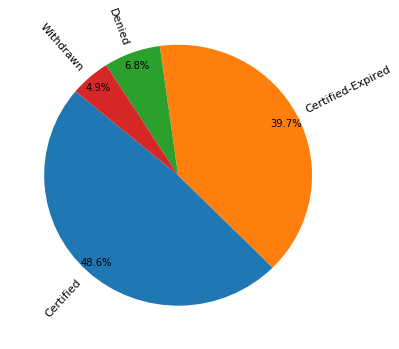

In [21]:
print ('% del estado de cada una de las aplicaciones para visa')
crearGrafico(y_train)

In [22]:
def buscarColumnasSinValores( data, porc ):
    i = 0;
    fila = 1;
    for col in data.columns:
        i = i+1;
        porcNulos = np.round(100 - 100*data[col].count()/len(data['case_status']),decimals=2);
        if porcNulos >= porc:            
            print("Columna ", fila, " : ", col , " tiene ", porcNulos, " % de valores nulos" );
            fila = fila + 1;

In [23]:
datos['add_these_pw_job_title_9089'].isnull().sum()


332168

In [24]:
len(datos['case_status'])

374362

In [25]:
datos2 = datos.loc[:,datos.count() >= 330000]
datos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374362 entries, 0 to 374361
Data columns (total 17 columns):
case_status               374362 non-null object
class_of_admission        351517 non-null object
country_of_citizenship    353729 non-null object
decision_date             374362 non-null object
employer_address_1        374320 non-null object
employer_city             374348 non-null object
employer_name             374350 non-null object
employer_postal_code      374325 non-null object
employer_state            374320 non-null object
job_info_work_city        374260 non-null object
job_info_work_state       374259 non-null object
pw_amount_9089            372146 non-null object
pw_level_9089             346735 non-null object
pw_soc_code               373965 non-null object
pw_soc_title              372026 non-null object
pw_source_name_9089       372263 non-null object
pw_unit_of_pay_9089       372790 non-null object
dtypes: object(17)
memory usage: 48.6+ MB


In [26]:
datos['country_of_citzenship'].isnull().sum()

353788

In [31]:
buscarColumnasSinValores( datos, 85 )


Columna  1  :  add_these_pw_job_title_9089  tiene  88.73  % de valores nulos
Columna  2  :  country_of_citzenship  tiene  94.5  % de valores nulos
Columna  3  :  employer_phone_ext  tiene  93.73  % de valores nulos
Columna  4  :  foreign_worker_info_education_other  tiene  98.95  % de valores nulos
Columna  5  :  ji_live_in_dom_svc_contract  tiene  99.36  % de valores nulos
Columna  6  :  job_info_alt_combo_ed_other  tiene  97.54  % de valores nulos
Columna  7  :  job_info_education_other  tiene  97.92  % de valores nulos
Columna  8  :  job_info_training_field  tiene  98.8  % de valores nulos
Columna  9  :  job_info_training_num_months  tiene  98.72  % de valores nulos
Columna  10  :  naics_2007_us_code  tiene  94.52  % de valores nulos
Columna  11  :  naics_2007_us_title  tiene  94.68  % de valores nulos
Columna  12  :  orig_case_no  tiene  99.92  % de valores nulos
Columna  13  :  orig_file_date  tiene  99.92  % de valores nulos
Columna  14  :  pw_source_name_other_9089  tiene  95.79

In [133]:
columnasConNan.loc[:, columnasConNan.count() = 0] 

SyntaxError: invalid syntax (<ipython-input-133-739cecb0f70c>, line 1)

# Aplicacion de SVM

Aplicación del modelo de Vectores para el cálculo del mejor scrore